In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import date
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/%D7%A9%D7%99%D7%A0%D7%94-%D7%98%D7%95%D7%91%D7%94-scaled.jpg?raw=true' width='800'/>

**כעת אנו מעוניינים לבדוק ולחקור את השפעת הרגלי השינה של עוני הסקר על תחומי החיים שלהם**
**נבחן את עמודות שעות השינה למול מספר עמודות אחרות וננסה להסביר זאת על פי הדאטה**

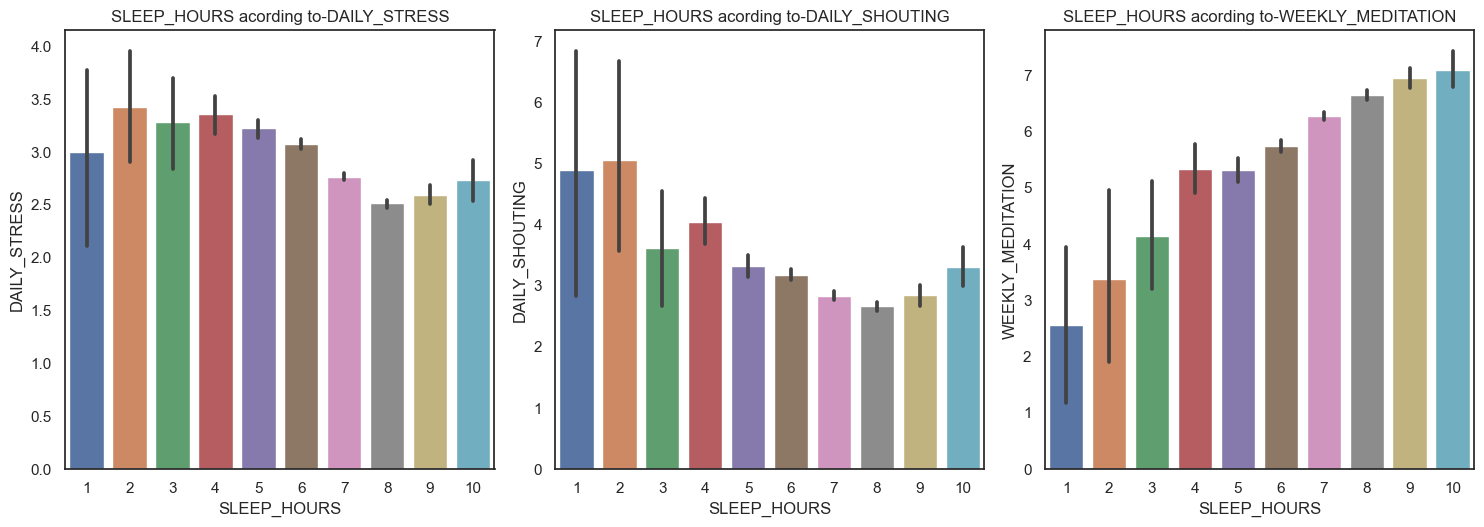

In [61]:
relevant_columns = ['SLEEP_HOURS', 'DAILY_STRESS','DAILY_SHOUTING', 'WEEKLY_MEDITATION']
life_df = data[relevant_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 10))

for i, column in enumerate(relevant_columns[1:]):  # Exclude SLEEP_HOURS from relevant_columns
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='SLEEP_HOURS', y=column, data=life_df)
    plt.title(f'SLEEP_HOURS acording to-{column}')
    plt.xlabel('SLEEP_HOURS')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


**מכיוון שבאופן הגיוני ברור כי שעת שינה אחת או אפילו 2 או 3 שעות אינן מספיקות לאדם ממוצע נסווג לפי הנתונים של הדאטה את מספר העונים בסקר לפי טווח הגילאים שלהם ולפי מספר שעות השינה שלהם**

In [60]:
bins = [0, 3, 8, 10]
labels = ['1-3 hours', '4-8 hours', '9-10 hours']
data['SLEEP_CATEGORY'] = pd.cut(data['SLEEP_HOURS'], bins=bins, labels=labels)

sleep_age_count = data.groupby(['SLEEP_CATEGORY']).size().reset_index(name='The number of respondents:')
print(sleep_age_count)

  SLEEP_CATEGORY  The number of respondents:
0      1-3 hours                          88
1      4-8 hours                       14564
2     9-10 hours                        1320


**לפי הטבלה ניתן להבחין כי באופן הגיוני- מעט מאוד אנשים ישנים בין 1-3 שעות וכי מספרם זניח לגמי לעומת האנשים שישנים 4 שעות ויותר**

 **עוד ניתן להסיק כי מספר שעות השינה הממוצע של עוני הסקר הוא 4-8 שעות שינה ולכן נעדיף להתמקד בהם בשלב זה**

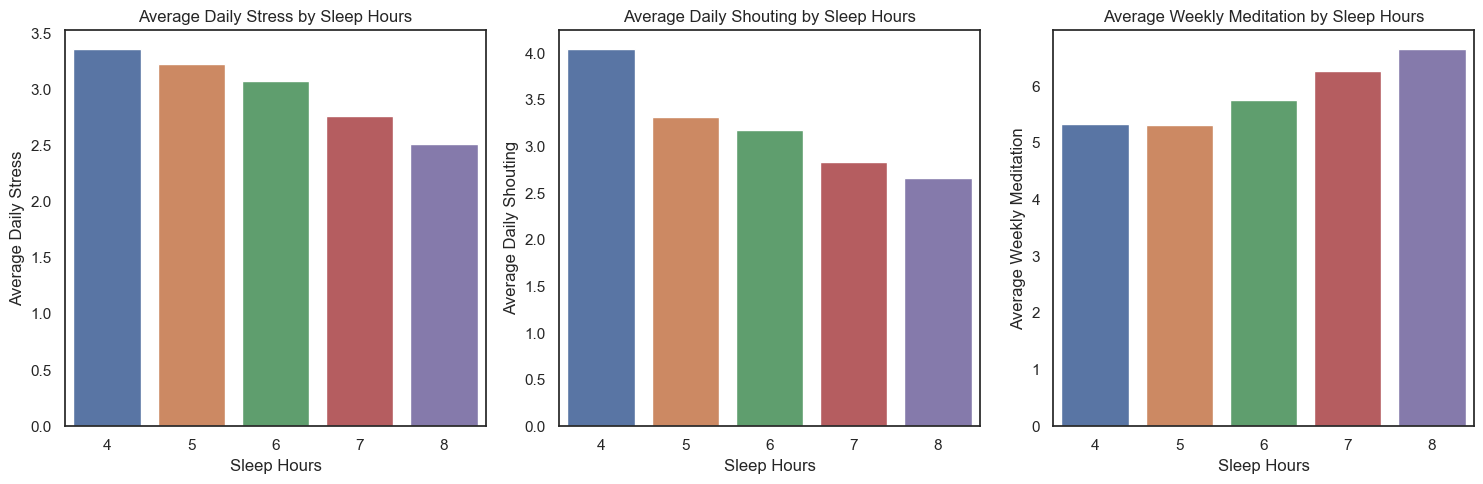

In [38]:
filtered_data = data[(data['SLEEP_HOURS'] >= 4) & (data['SLEEP_HOURS'] <= 8)].copy()

filtered_data.loc[:, 'DAILY_STRESS'] = pd.to_numeric(filtered_data['DAILY_STRESS'], errors='coerce')
filtered_data.loc[:, 'DAILY_SHOUTING'] = pd.to_numeric(filtered_data['DAILY_SHOUTING'], errors='coerce')
filtered_data.loc[:, 'WEEKLY_MEDITATION'] = pd.to_numeric(filtered_data['WEEKLY_MEDITATION'], errors='coerce')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='SLEEP_HOURS', y='DAILY_STRESS', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Daily Stress by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Daily Stress')

plt.subplot(1, 3, 2)
sns.barplot(x='SLEEP_HOURS', y='DAILY_SHOUTING', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Daily Shouting by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Daily Shouting')

plt.subplot(1, 3, 3)
sns.barplot(x='SLEEP_HOURS', y='WEEKLY_MEDITATION', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Weekly Meditation by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Weekly Meditation')

plt.tight_layout()
plt.show()


**כעת ניתן להסיק מספר מסקנות ביניים:
ככל שאדם ישן יותר כך רמת הלחץ שלו יורדת וזאת בהתאם לגרף הראשון.
עוד ניתן להסיק כי ככל שאדם ישן יותר רמת הצעקות היומית שלו יורדת משמעותית מ4 ל3 ביום.
עוד ניתן להסיק לאור הגרף השלישי כי ככל שהאדם ישן יותר כך הוא פנוי לעשות מדיטציה ולחשוב עם עצמו כיצד להשתפר.
לכן ניתן לומר כי מהגרפים למעלה עולה כי ככל שאדם ישן בלילה מספר שעות מספק- הדבר בבירור ישפיע לטובה על התפקוד שלו במהלך היום.**

**כעת אנו מעוניינים לחזור ולנתח את האנשים שלפי הסקר ישנים מספר שעות הגבוה מ8 ולנתח את רמת הלחץ שלהם**

C:\Users\ariel\AppData\Local\Temp\ipykernel_6080\1415611669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DAILY_STRESS'] = pd.to_numeric(filtered_data['DAILY_STRESS'], errors='coerce')
C:\Users\ariel\AppData\Local\Temp\ipykernel_6080\1415611669.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AGE', y='DAILY_STRESS', data=filtered_data, estimator=pd.Series.mean, ci=None)


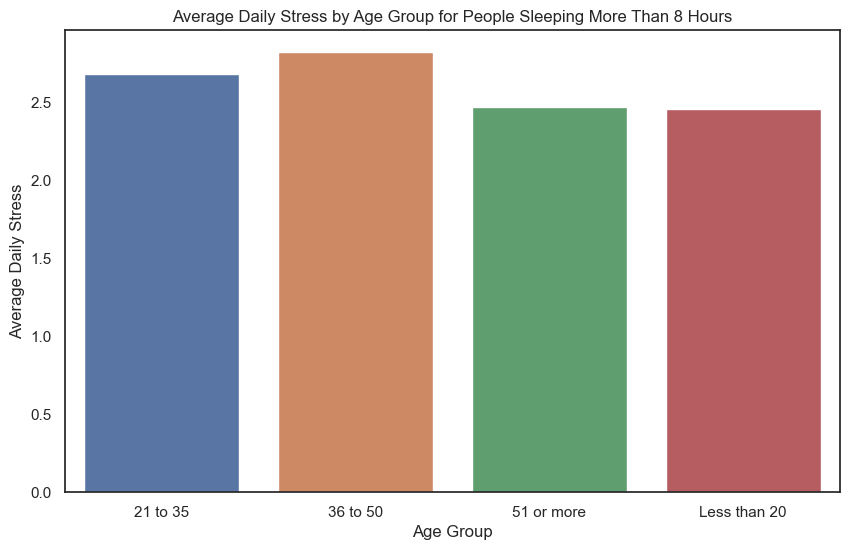

In [93]:
filtered_data = data[data['SLEEP_HOURS'] > 8]
filtered_data['DAILY_STRESS'] = pd.to_numeric(filtered_data['DAILY_STRESS'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='DAILY_STRESS', data=filtered_data, estimator=pd.Series.mean, ci=None)
plt.title('Average Daily Stress by Age Group for People Sleeping More Than 8 Hours')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Stress')
plt.show()


**כאשר נסווג את רמות הלחץ של אנשים שישנים מעל 8 שעותלפי קבוצות גיל-ניתן לראות כי קבוצת הגיל שמתחת ל20 וקבוצת הגיל שמעל 51 נמצאים בתוך רמת  הלחץ הממוצעת של אנשים שישנו 8 שעות שהיא 2.5 (רמת הלחץ כאמור הינה דבר לא מדיד, עוני הסקר נדרשו לסווג את רמת הלחץ שלהם בטווח שבין 1-5).
ניתן לשער כי רמת הלחץ הגבוהה במעט מן הממוצע של קבוצות הגיל האמצעיות 21-35 ו36-50 בכך שאותן קבוצות גיל נמצאות בשיא החיים שלהן. הזוגיות, העבודה והקריירה, הילדים משפיעים יותר על רמת הלחץ באופן טבעי וזאת לדעתנו הסיבה לעלייה הקטנה מן הממוצע ברמת הלחץ של שכבות גיל אלו.

**כעת ניתן להסיק בבירור ולומר כי שינה מספקת מאפשרת לגוף ולמוח להתאושש, מה שמפחית את רמות הקורטיזול (הורמון הסטרס) ומגביר את היכולת להתמודד עם לחצי היומיום.**

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/stress(3)(1).jpg?raw=true' width='800'/>

**כעת נעבור לנתח את מספר הצעקות היומי של אנשים שישנו מעל 8 שעות לפי קבוצות הגיל. כאמור המשיבים בסקר התבקשו למלא באופן יחסי את מספר הצעקות או הכעסים שהם מכוונים כלפי הסביבה שלהם באופן יום-יומי בטווח שבין 1-10.**

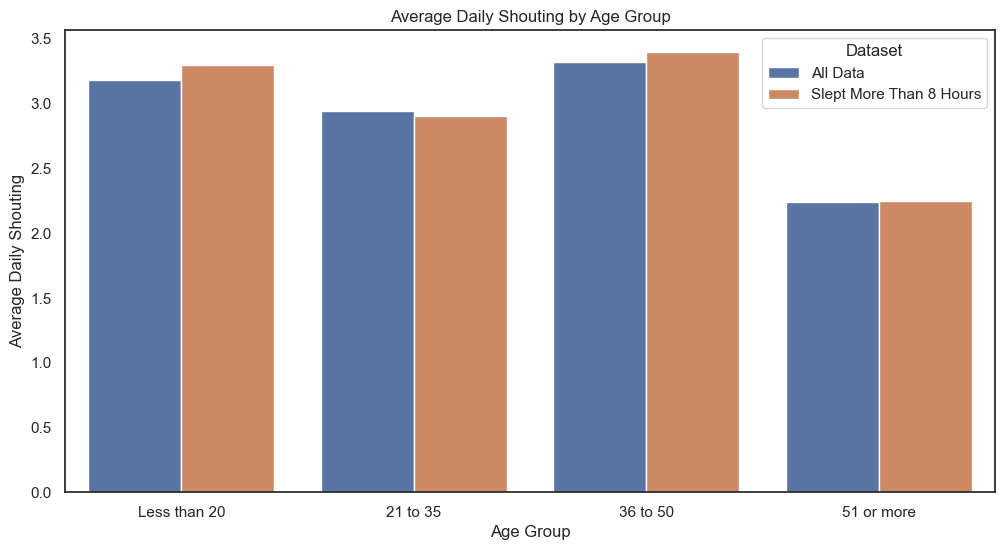

In [63]:
data['DAILY_SHOUTING'] = pd.to_numeric(data['DAILY_SHOUTING'], errors='coerce')

filtered_data = data[data['SLEEP_HOURS'] > 8].copy()
filtered_data['DATASET'] = 'Slept More Than 8 Hours'

data['DATASET'] = 'All Data'

combined_data = pd.concat([data, filtered_data])

age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
combined_data['AGE'] = pd.Categorical(combined_data['AGE'], categories=age_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='AGE', y='DAILY_SHOUTING', hue='DATASET', data=combined_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Average Daily Shouting by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Shouting')
plt.legend(title='Dataset')
plt.show()


**מתוך השוואה שערכנו בין רמת הצעקות של אנשים שישנו יותר מ8 לבין רמת הצעקות הכללית בסווג לפי קבוצות גיל עולה כי אין פערים משמעותיים וכי אנשים שישנו יותר אינם צועקים יותר בממוצע לפי שכבת גילם.**

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/77140900100791980551no.jpg?raw=true' width='800'/>

**כעת אחרי שראינו את השפעות שעות השינה על רמת הלחץ, כעס וזמני מדיטציה בהמלך היום, נרצה לבחון את רמת השפעת שעות השינה על בריאותו הפיזית של הגוף שמבוטאת בדאטה כעמודת BMI
המשיבים בסקר התבקשו למלא את הערכים של מסת גופם בטווח של 1-2 ולכן אנו נבחן את השינויים בדיוק מירבי לאחר הנקודה.** 

             BMI_RANGE
SLEEP_HOURS           
4             1.523810
5             1.521951
6             1.474536
7             1.392921
8             1.361008


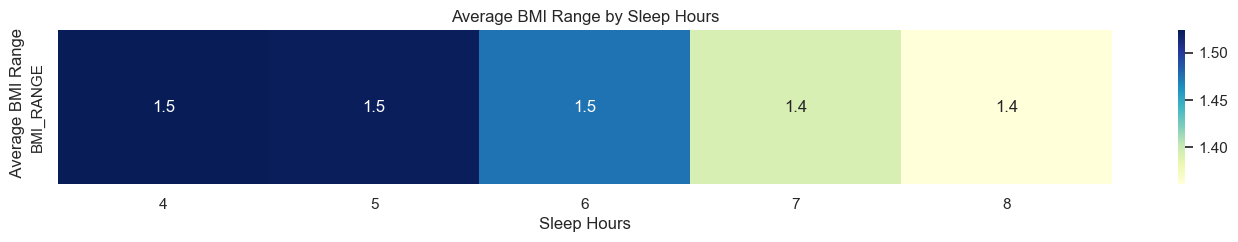

In [92]:
filtered_data = data.loc[(data['SLEEP_HOURS'] >= 4) & (data['SLEEP_HOURS'] <= 8)].copy()
pivot_table = filtered_data.pivot_table(values='BMI_RANGE', index='SLEEP_HOURS', aggfunc='mean')
print(pivot_table)
plt.figure(figsize=(17, 2))
sns.heatmap(pivot_table.T, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Average BMI Range by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('  Average BMI Range')
plt.show()


**נשים לב כי באופן ברור אדם שישן 4 שעות בממוצע ללילה טווח המסה שלו בקרב העונים על הסקר גדול יותר מאדם שישן 8 שעות. ולכן ניתן להסיק שבקרב העונים על הסקר אנשים שישנים יותר שעות בממוצע נמצאים בטווח תקין יותר מבחינת המסת גוף שלהם דבר שמשפיע על בריאותם הפיזית** 

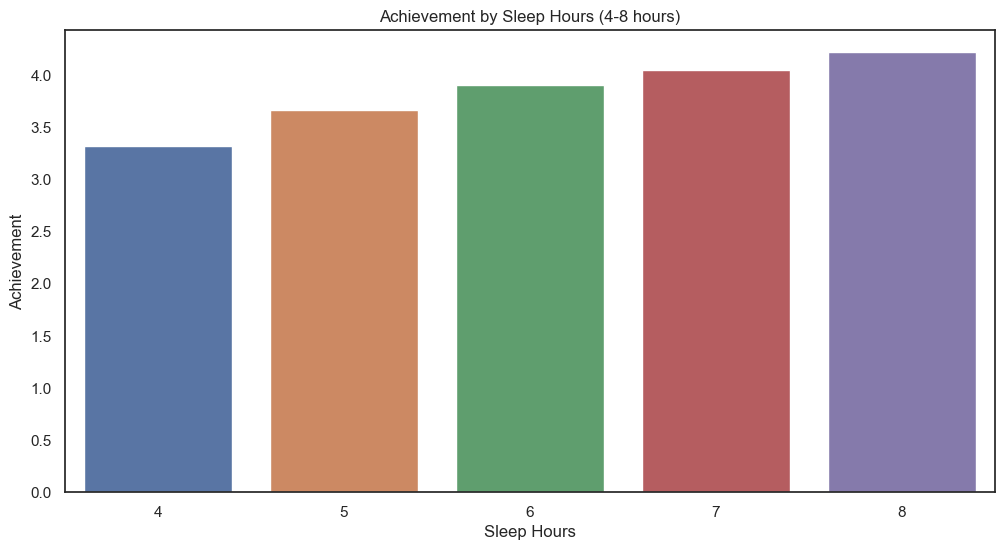

In [64]:
filtered_data = data[(data['SLEEP_HOURS'] >= 4) & (data['SLEEP_HOURS'] <= 8)].copy()
filtered_data['ACHIEVEMENT'] = pd.to_numeric(filtered_data['ACHIEVEMENT'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.barplot(x='SLEEP_HOURS', y='ACHIEVEMENT', data=filtered_data, estimator=pd.Series.mean, errorbar=None)
plt.title('Achievement by Sleep Hours (4-8 hours)')
plt.xlabel('Sleep Hours')
plt.ylabel('Achievement')
plt.show()


**עוד ניתן לראות שאדם חווה תחושת הישג גדולה יותר כאשר הוא ישן מספר שעות גבוה יותר.**

<img src='https://github.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/blob/main/images.jpg?raw=true' width='800'/>

**מניתוח הנתונים עולה כי לשינה מספקת (בין 4-8 שעות בלילה) יש השפעה חיובית רבה על רמות הסטרס, תחושת ההישג, רמת הצעקות והכעס היומית וזמן המדיטציה השבועי.
עוד עלה במהלך המחקר כי יתכן שקבוצות הגיל האמצעיות מ21-50 נוטות להיות בלחץ גבוה מן הממוצע על אף שישנו מספיק וזאת מכיוון שזהו שיא חייהם והלחץ בשנים הללו גבוה מן הממוצע בעקבות כך.
לסיכום: שינה מספקת היא מרכיב חיוני לבריאות ולשמירה על גוף האדם בכל גיל, לשמירה על מערכות יחסים תקינות עם הסובבים אותו, ואף לביצועים טובים יותר.
בעקבות המחקר נמליץ כי חשוב להקפיד על שעות שינה מסודרות ומספקות כחלק מאורח חיים בריא ומאוזן.**